<a href="https://colab.research.google.com/github/crazy85128x/ML0930/blob/master/cnn_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [20]:
trans = [
    "airplane",										
    "automobile",										
    "bird",							
    "cat",									
    "deer",										
    "dog",									
    "frog",										
    "horse",										
    "ship",									
    "truck"
]


In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [22]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

ans  bird


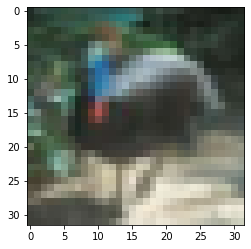

In [23]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0]-1)
print("ans ", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
layers = [
    # 27(1 filter) * 64 + 64 -> 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 576(1 filter) * 128 + 128 -> 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [25]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [26]:
x_train_norm=x_train/255
x_test_norm=x_test/255

In [27]:
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=100,
     epochs=100,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/100
450/450 - 4s - loss: 1.8223 - accuracy: 0.3160 - val_loss: 1.5636 - val_accuracy: 0.4236
Epoch 2/100
450/450 - 3s - loss: 1.5126 - accuracy: 0.4537 - val_loss: 1.3754 - val_accuracy: 0.4990
Epoch 3/100
450/450 - 3s - loss: 1.3510 - accuracy: 0.5124 - val_loss: 1.2926 - val_accuracy: 0.5358
Epoch 4/100
450/450 - 3s - loss: 1.2393 - accuracy: 0.5570 - val_loss: 1.2235 - val_accuracy: 0.5618
Epoch 5/100
450/450 - 3s - loss: 1.1674 - accuracy: 0.5850 - val_loss: 1.0934 - val_accuracy: 0.6108
Epoch 6/100
450/450 - 3s - loss: 1.0947 - accuracy: 0.6102 - val_loss: 1.0694 - val_accuracy: 0.6208
Epoch 7/100
450/450 - 3s - loss: 1.0435 - accuracy: 0.6315 - val_loss: 1.0059 - val_accuracy: 0.6442
Epoch 8/100
450/450 - 3s - loss: 1.0003 - accuracy: 0.6463 - val_loss: 0.9538 - val_accuracy: 0.6666
Epoch 9/100
450/450 - 3s - loss: 0.9622 - accuracy: 0.6612 - val_loss: 0.9312 - val_accuracy: 0.6726
Epoch 10/100
450/450 - 3s - loss: 0.9199 - accuracy: 0.6738 - val_loss: 0.9202 - val_accura

In [28]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6572 - accuracy: 0.7858


[0.6572381854057312, 0.7857999801635742]

In [29]:
pre = model.predict_classes(x_test_norm)
print(pre.shape)
print(y_test.shape)
y_test_r = y_test.reshape(10000)
print(y_test_r.shape)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
(10000,)
(10000, 1)
(10000,)


array([3, 8, 8, ..., 5, 1, 7])

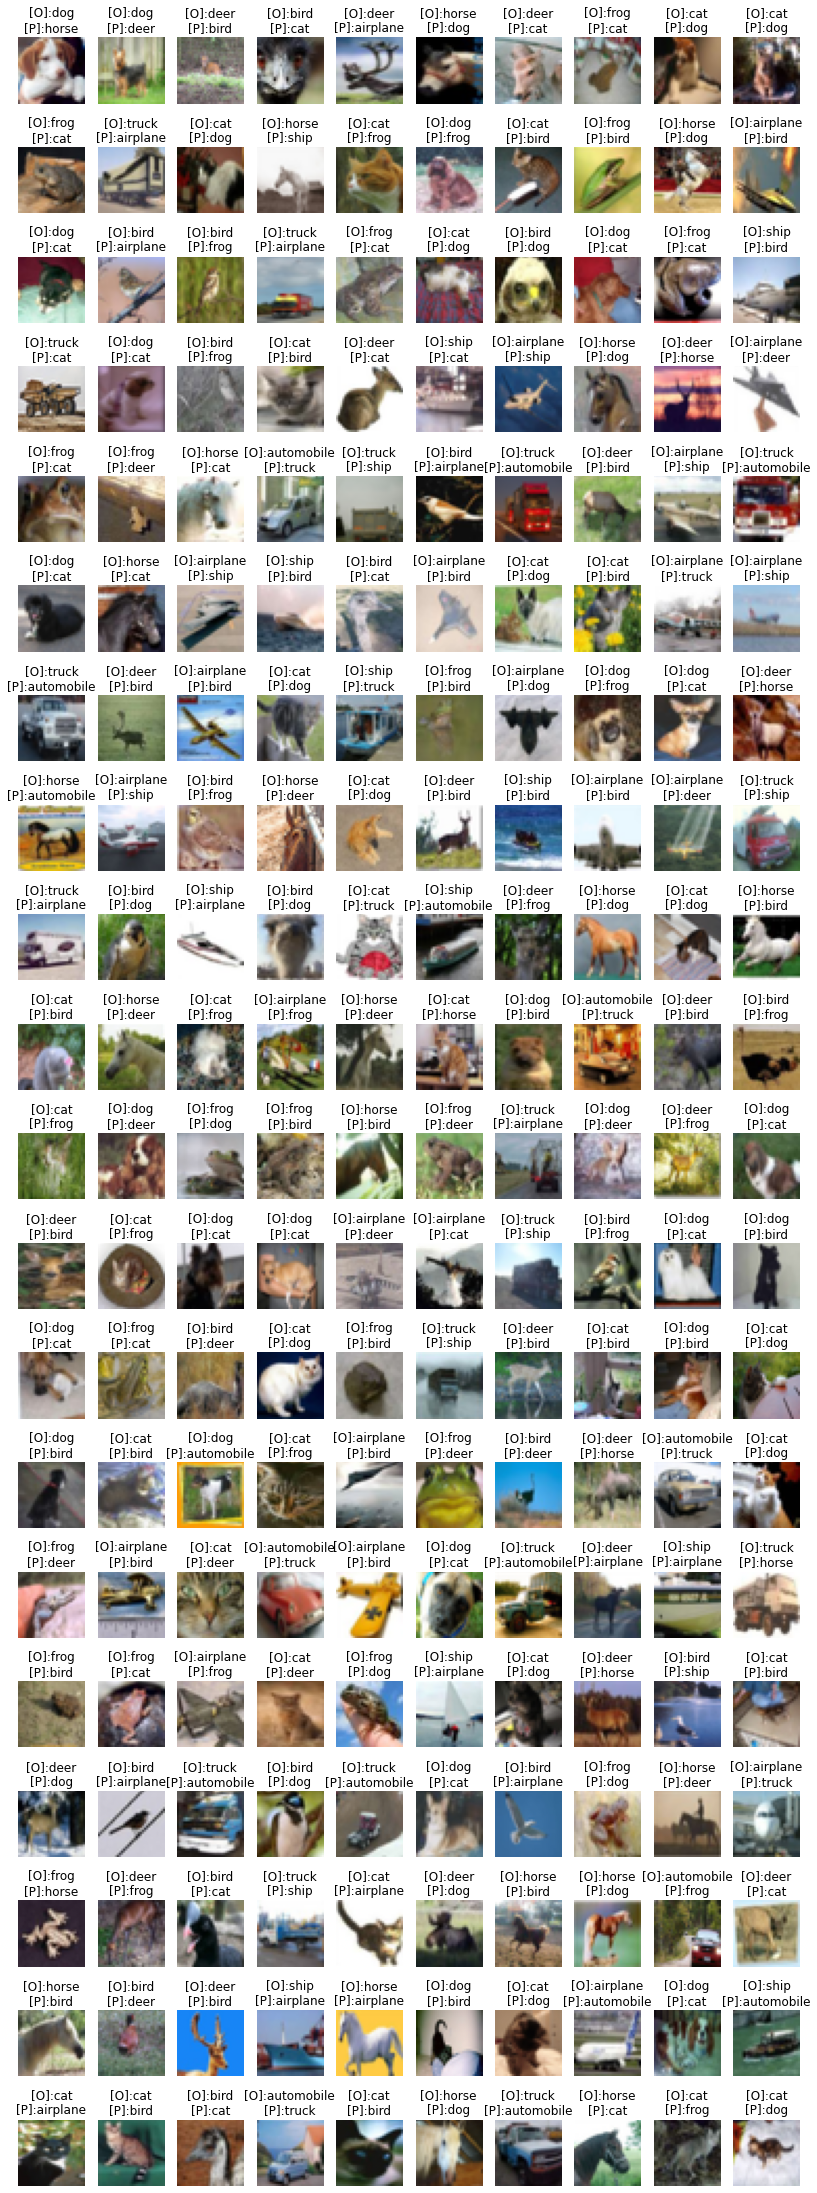

In [30]:
# subplot(總高度, 總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_img = x_test[idx]
false_label = y_test_r[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

輸入網址:https://c.files.bbci.co.uk/12A9B/production/_111434467_gettyimages-1143489763.jpg
airplane 的機率是: 0.0
automobile 的機率是: 0.0
bird 的機率是: 0.003
cat 的機率是: 0.85
deer 的機率是: 0.001
dog 的機率是: 0.121
frog 的機率是: 0.023
horse 的機率是: 0.002
ship 的機率是: 0.0
truck 的機率是: 0.0
應該是: cat


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


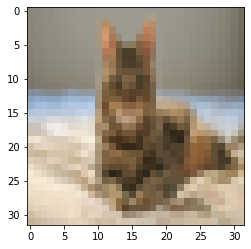

In [32]:
# pip install pillow
import PIL
import requests
url = input("輸入網址:")
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=h)
img = PIL.Image.open(response.raw).resize((32, 32))
img_np = np.array(img)
test = img_np.reshape(1, 32, 32, 3) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(trans[i], "的機率是:", round(p, 3))
ans = model.predict_classes(test)[0]
print("應該是:", trans[ans])
plt.imshow(img_np)